# materials are referenced from https://www.kaggle.com/benhamner/clinton-trump-tweets

the 2016 US president election, tweets play an increasing important role in it. So i want to do some text analysis, for example, sentiment analysis.

# 1. Preparation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets = pd.read_csv('/Users/guochenxin/Desktop/tweets.csv')

# 2. Data content

In [97]:
print(tweets.shape)
tweets.head()

(6444, 32)


,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities,year,month,day,hour
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28 00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...,2016,9,28,0
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27 23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...,2016,9,27,23
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27 23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN,2016,9,27,23
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27 23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...,2016,9,27,23
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27 22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN,2016,9,27,22


In [5]:
# seperate time as year, month, day,
tweets['time'] = pd.to_datetime(tweets['time'])
tweets['year'] = tweets['time'].map(lambda x: x.year)
tweets['month'] = tweets['time'].map(lambda x: x.month)
tweets['day'] = tweets['time'].map(lambda x: x.day)
tweets['hour'] = tweets['time'].map(lambda x: x.hour)

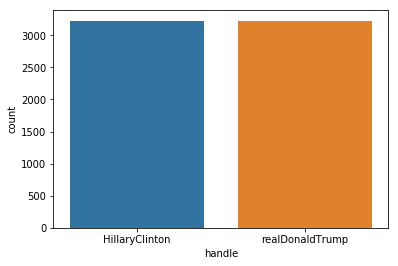

In [6]:
# count number of tweets both Clinton and Trump
sns.countplot(x='handle', data = tweets)

[[Text(0, 0, 'tweets'), Text(0, 0, 'retweets')]]

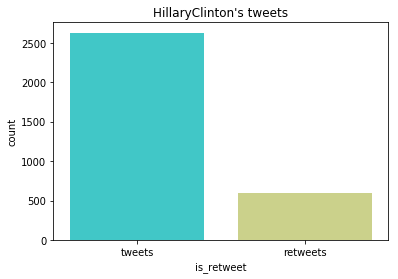

In [7]:
tweets_clinton_retweet = tweets.loc[tweets['handle'] == 'HillaryClinton', ['is_retweet']]
tweets_trump_retweet = tweets.loc[tweets['handle'] == 'realDonaldTrump', ['is_retweet']]
graph1 = sns.countplot(tweets_clinton_retweet['is_retweet'], palette = 'rainbow')
graph1.set_title("HillaryClinton's tweets")
graph1.set(xticklabels = ['tweets', 'retweets'])

[[Text(0, 0, 'tweets'), Text(0, 0, 'retweets')]]

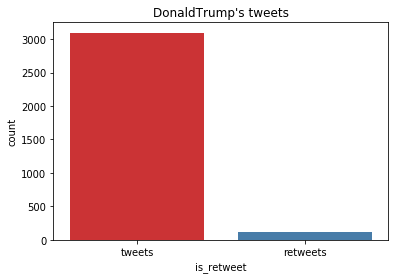

In [8]:
graph2 = sns.countplot(tweets_trump_retweet['is_retweet'], palette = 'Set1')
graph2.set_title("DonaldTrump's tweets")
graph2.set(xticklabels = ['tweets', 'retweets'])

# 3. Time analysis of numbers of tweets


month                1      2      3      4      5      6      7      8      9
handle                                                                        
HillaryClinton     NaN    NaN    NaN  206.0  359.0  521.0  938.0  519.0  683.0
realDonaldTrump  438.0  494.0  441.0  283.0  351.0  303.0  358.0  283.0  267.0


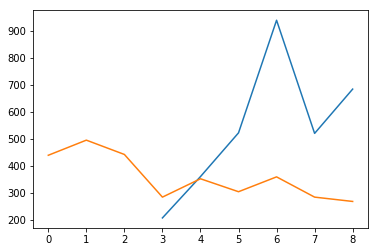

In [9]:
# number of tweets monthly
monthly_tweets = tweets.groupby(['handle', 'month']).size().unstack()
print(monthly_tweets)
for i in range(len(monthly_tweets)):
    plt.plot(list(range(9)), monthly_tweets.iloc[i, :])

day              1    2   3   4   5    6   7    8    9   10 ...   22   23  \
handle                                                      ...             
HillaryClinton   72   73  69  60  96   79  72  141   58  76 ...  131  138   
realDonaldTrump  85  115  99  74  88  113  89  118  104  99 ...  107  131   

day               24   25   26   27   28   29  30  31  
handle                                                 
HillaryClinton    71  119  170  252  149  145  56  51  
realDonaldTrump  131  114  151  141  134  111  84  43  

[2 rows x 31 columns]


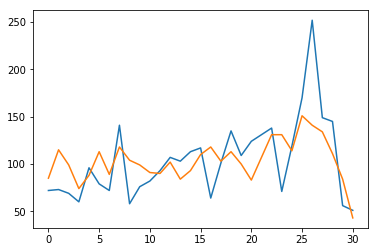

In [10]:
# number of tweets daily
daily_tweets = tweets.groupby(['handle', 'day']).size().unstack()
print(daily_tweets)
for i in range(len(daily_tweets)):
    plt.plot(list(range(31)), daily_tweets.iloc[i, :])

# 4. text mining

In [41]:
# start from pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS

tweets_clinton = tweets.loc[tweets['handle'] == 'HillaryClinton', ['text']]
tweets_trump = tweets.loc[tweets['handle'] == 'realDonaldTrump', ['text']]

In [38]:
stopwords = set(STOPWORDS)
stopwords.add('http')
stopwords.add('https')
stopwords.add('amp')
stopwords.add('CO')
stopwords.add('Trump')
stopwords.add('Donald')
stopwords.add('Trump2016')
stopwords.add('TrumpDonald')
stopwords.add('Clinton')
stopwords.add('Hillary')
stopwords.add('HillaryClinton')
stopwords.add('realDonaldTrump')
stopwords.add('will')
stopwords.add('say')
stopwords.add('said')
stopwords.add('let')
stopwords.add('vote')
stopwords.add('now')
stopwords.add('go')

# the words Clinton uses most

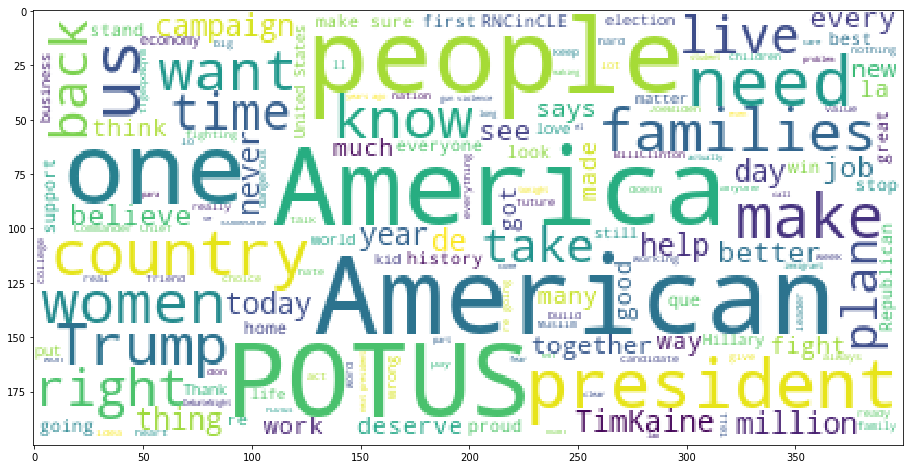

In [40]:
wordcloud = WordCloud(background_color = 'white', max_font_size=50, relative_scaling = 0.5, stopwords=stopwords).generate(tweets_clinton['text'].str.cat())
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)

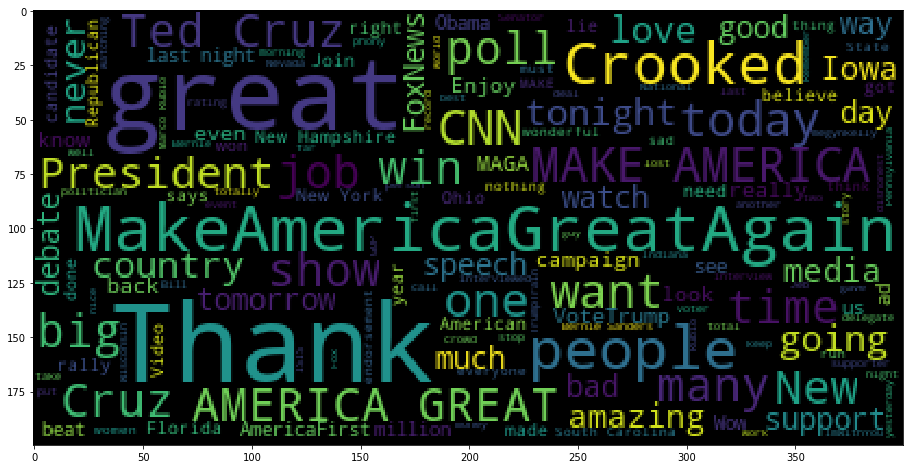

In [42]:
wordcloud_2 = WordCloud(max_font_size=50, relative_scaling = 0.5, stopwords=stopwords).generate(tweets_trump['text'].str.cat())
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_2)

# sentiment analysis

In [43]:
# the TextBlob contains a lot of lexicons in the sentiment dataset
from textblob import TextBlob, Word, Blobber

In [57]:
text = tweets['text'].str.cat()
test = TextBlob(text)

In [59]:
test.sentiment

Sentiment(polarity=0.15333904950900756, subjectivity=0.5051021524548366)

In [65]:
bloblist=list()
text = tweets['text'].astype(str)
for row in text:
    blob = TextBlob(row)
    bloblist.append((row, blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_bloblist = pd.DataFrame(bloblist, columns = ['text', 'polarity', 'subjectivity'])

,text,polarity,subjectivity
0,The question in this election: Who can put the...,0.300000,0.300000
1,"Last night, Donald Trump said not paying taxes...",0.107143,0.354762
2,Couldn't be more proud of @HillaryClinton. Her...,0.300000,0.413333
3,"If we stand together, there's nothing we can't...",0.350000,0.694444
4,Both candidates were asked about how they'd co...,0.100000,0.650000


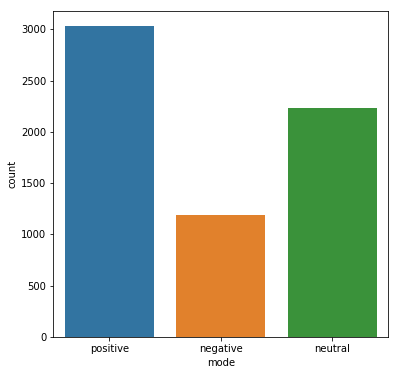

In [85]:
def value_func (row):
    if row['polarity'] > 0:
        return 'positive'
    elif row['polarity'] == 0:
        return 'neutral'
    else:
        return 'negative'
df_bloblist['mode'] = df_bloblist.apply(value_func, axis=1)

plt.figure(figsize = (6,6))
a = sns.countplot(x = 'mode', data = df_bloblist )
a
# therefore, for the entire data text, positive texts are more that negative

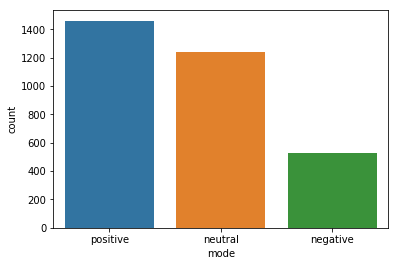

In [94]:
# sentiment analysis for Clinton:
text_C = tweets_clinton['text'].astype(str)
bloblist_C = list()
for row in text_C:
    blob_C = TextBlob(row)
    bloblist_C.append((row, blob_C.sentiment.polarity, blob_C.sentiment.subjectivity))
    df_bloblist_C = pd.DataFrame(bloblist_C, columns = ['text', 'polarity', 'subjectivity'])
    
df_bloblist_C['mode'] = df_bloblist_C.apply(value_func, axis=1)
b = sns.countplot(x = 'mode', data = df_bloblist_C )

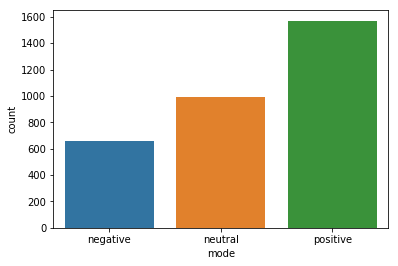

In [93]:
# sentiment analysis for Clinton:
text_T = tweets_trump['text'].astype(str)
bloblist_T = list()
for row in text_T:
    blob_T = TextBlob(row)
    bloblist_T.append((row, blob_T.sentiment.polarity, blob_T.sentiment.subjectivity))
    df_bloblist_T = pd.DataFrame(bloblist_T, columns = ['text', 'polarity', 'subjectivity'])

df_bloblist_T['mode'] = df_bloblist_T.apply(value_func, axis=1)
c = sns.countplot(x = 'mode', data = df_bloblist_T )